In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('EnergyConsumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [7]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [8]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [9]:
non_num_cols=df.select_dtypes(exclude=[np.number]).columns.tolist()
non_num_cols

['Timestamp', 'HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

In [10]:
non_num_cols.remove('Timestamp')
non_num_cols

['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

In [11]:
for n in non_num_cols:
    print(df[n].unique())

['On' 'Off']
['Off' 'On']
['Monday' 'Saturday' 'Sunday' 'Wednesday' 'Friday' 'Thursday' 'Tuesday']
['No' 'Yes']


In [12]:
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['DayOfWeek'] = df['DayOfWeek'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})


In [13]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,6,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,7,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,3,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732


Developing model

# Explaining the data
Data Overview:
- This dataset contains energy consumption data with 1000 records
- The target variable is 'EnergyConsumption' measured in some energy units
- Features include environmental factors (Temperature, Humidity), building characteristics (SquareFootage)
  usage patterns (Occupancy, HVAC, Lighting), and temporal information (DayOfWeek, Holiday)
- All categorical variables have been encoded to numerical values

Recommended Algorithms for Energy Consumption Prediction:
1. Random Forest Regression - Can handle non-linear relationships and feature interactions
2. Gradient Boosting (XGBoost/LightGBM) - Typically performs well on this type of tabular data
3. Multiple Linear Regression - As a baseline model
4. Neural Networks - If complex patterns exist and with proper feature engineering

Gradient Boosting methods are likely the best fit because:
- Energy consumption often has non-linear relationships with features like temperature
- They can capture interactions between features (like HVAC usage and temperature)
- They typically handle mixed data types well
- They're robust against outliers and can handle the different scales of features

Random Forest Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Timestamp', 'EnergyConsumption'], axis=1), df['EnergyConsumption'], test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((800, 9), (200, 9), (800,), (200,))

In [17]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled[:5], x_test_scaled[:5]

(array([[-0.60007123,  0.11723233,  0.51063898, -0.93096815, -1.00752834,
          1.02532046,  0.33478968, -1.08067495, -0.90911166],
        [-1.01407377, -1.368855  ,  1.71124264,  0.81815003, -1.00752834,
         -0.97530483, -1.23448958,  0.44678081,  1.09997489],
        [ 0.41577638, -0.24227922,  0.25573863, -0.93096815, -1.00752834,
         -0.97530483, -1.14691778, -1.58982687, -0.90911166],
        [-0.49292495, -0.04673249, -1.28068469,  0.46832639,  0.99252792,
          1.02532046, -0.8830278 , -1.58982687, -0.90911166],
        [ 0.62624462, -1.50769548,  0.81220342,  0.11850276, -1.00752834,
          1.02532046,  0.7974748 ,  0.95593273,  1.09997489]]),
 array([[ 0.421798  ,  0.40293238, -0.70463059,  1.16797366,  0.99252792,
          1.02532046, -1.1088646 , -0.06237111,  1.09997489],
        [ 0.78994503, -1.35465891, -0.16393411, -0.23132088,  0.99252792,
         -0.97530483, -1.26412462, -0.57152303, -0.90911166],
        [ 0.07776934, -0.88194205,  1.2841232 

In [18]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred[:5], y_test[:5]

(array([85.71566706, 82.35102867, 76.04901048, 87.96036935, 75.06500307]),
 521    86.920611
 737    88.351606
 740    79.431363
 660    90.009188
 411    83.891100
 Name: EnergyConsumption, dtype: float64)

In [19]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      200 non-null    float64
 1   Humidity         200 non-null    float64
 2   SquareFootage    200 non-null    float64
 3   Occupancy        200 non-null    int64  
 4   HVACUsage        200 non-null    int64  
 5   LightingUsage    200 non-null    int64  
 6   RenewableEnergy  200 non-null    float64
 7   DayOfWeek        200 non-null    int64  
 8   Holiday          200 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 15.6 KB


In [20]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mse, mae, r2

(29.86094469546986, 4.3776639486662825, 0.5441068482849292)

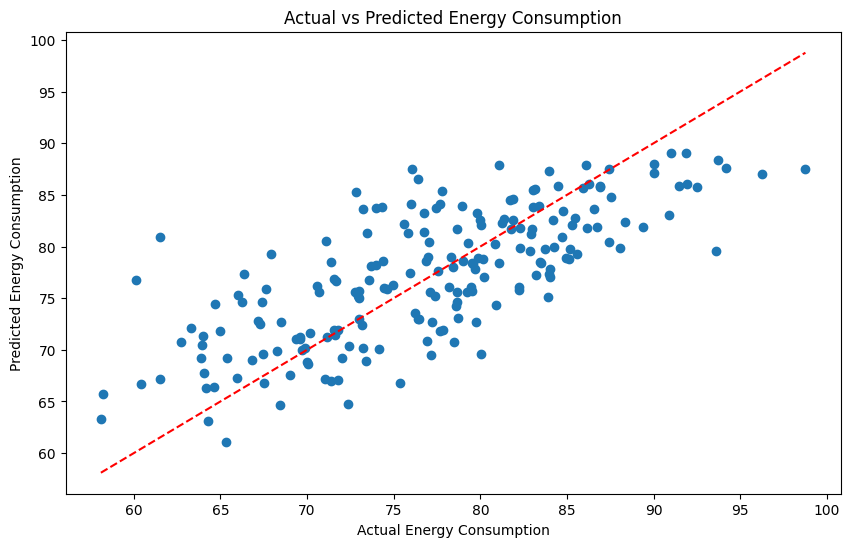

In [21]:
x_test['EnergyConsumption']=y_test
x_test['PredictedConsumption']=y_pred
x_test.head()
plt.figure(figsize=(10, 6))
plt.scatter(x_test['EnergyConsumption'], x_test['PredictedConsumption'])
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.plot([x_test['EnergyConsumption'].min(), x_test['EnergyConsumption'].max()], [x_test['EnergyConsumption'].min(), x_test['EnergyConsumption'].max()], 'r--')
plt.show()

In [33]:
#making model for users prediction
inp=np.array([[23.182844248720986,31.67991978011051,1633.9553295431137,8,'Off','Off',27.517099250037322,'Thursday','Yes']])

# Create DataFrame with appropriate column names to match training data
inp_df = pd.DataFrame(inp, columns=['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday'])

inp_df['HVACUsage'] = inp_df['HVACUsage'].map({'On': 1, 'Off': 0})
inp_df['LightingUsage'] = inp_df['LightingUsage'].map({'On': 1, 'Off': 0})
inp_df['DayOfWeek'] = inp_df['DayOfWeek'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
inp_df['Holiday'] = inp_df['Holiday'].map({'Yes': 1, 'No': 0})

inp_df

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday
0,23.182844248720986,31.67991978011051,1633.9553295431137,8,0,0,27.517099250037322,4,1


In [34]:
pred=model.predict(inp_df)
print(f"Predicted Energy Consumption: {pred[0]}")

Predicted Energy Consumption: 75.65437353045265


Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
model1=GradientBoostingRegressor(n_estimators=100, random_state=42)
# x_test=x_test.drop(['EnergyConsumption', 'PredictedConsumption'])
# x_train=x_train.drop(['EnergyConsumption'], axis=1)
model1.fit(x_train, y_train)
y_pred1=model1.predict(x_test)
y_pred1[:5], y_test[:5]

(array([82.66167919, 80.84750021, 75.41411136, 88.07441781, 74.61992482]),
 521    86.920611
 737    88.351606
 740    79.431363
 660    90.009188
 411    83.891100
 Name: EnergyConsumption, dtype: float64)

In [45]:
#Accuracy of the model
mse1=mean_squared_error(y_test, y_pred1)
mae1=mean_absolute_error(y_test, y_pred1)
r2_1=r2_score(y_test, y_pred1)
mse1, mae1, r2_1

(30.959996640568534, 4.466462944282406, 0.5273273973914809)

In [46]:
#making model for users prediction
inp=np.array([[23.182844248720986,31.67991978011051,1633.9553295431137,8,'Off','Off',27.517099250037322,'Thursday','Yes']])

# Create DataFrame with appropriate column names to match training data
inp_df = pd.DataFrame(inp, columns=['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday'])

inp_df['HVACUsage'] = inp_df['HVACUsage'].map({'On': 1, 'Off': 0})
inp_df['LightingUsage'] = inp_df['LightingUsage'].map({'On': 1, 'Off': 0})
inp_df['DayOfWeek'] = inp_df['DayOfWeek'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
inp_df['Holiday'] = inp_df['Holiday'].map({'Yes': 1, 'No': 0})

pred=model1.predict(inp_df)
print(f"Predicted Energy Consumption: {pred[0]}")

Predicted Energy Consumption: 76.52044125877487


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      200 non-null    float64
 1   Humidity         200 non-null    float64
 2   SquareFootage    200 non-null    float64
 3   Occupancy        200 non-null    int64  
 4   HVACUsage        200 non-null    int64  
 5   LightingUsage    200 non-null    int64  
 6   RenewableEnergy  200 non-null    float64
 7   DayOfWeek        200 non-null    int64  
 8   Holiday          200 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 23.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      800 non-null    float64
 1   Humidity         800 non-null    float64
 2   SquareFootage    800 non-null    float64
 3   Occupanc

(None, None)

In [32]:
# print(set(x_train.columns) - set(x_test.columns))  # Features missing in x_test
print(set(x_test.columns) - set(x_train.columns))  # Features missing in x_train

{'PredictedConsumption', 'EnergyConsumption'}


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      800 non-null    float64
 1   Humidity         800 non-null    float64
 2   SquareFootage    800 non-null    float64
 3   Occupancy        800 non-null    int64  
 4   HVACUsage        800 non-null    int64  
 5   LightingUsage    800 non-null    int64  
 6   RenewableEnergy  800 non-null    float64
 7   DayOfWeek        800 non-null    int64  
 8   Holiday          800 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 62.5 KB


In [ ]:
blablabla